# Machine Learning based Multivariate Time Series Forecasting of ISO New England Electricity Demand

# Implementation of Machine Learning Algorithm

1- Random Forest

2- CatBoost

3- XGBoost

4- Prophet 


In [1]:
import pandas as pd
import numpy as numpy

In [2]:
ME_zone = pd.read_csv("air_pollution.csv")

In [3]:
ME_zone.head()

,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
0,1/2/2010,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
1,1/3/2010,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2,1/4/2010,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
3,1/5/2010,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
4,1/6/2010,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


**Stationarity Check**

In [4]:
from statsmodels.tsa.stattools import adfuller
ME_zone = pd.read_csv("air_pollution.csv")

# ADF test for 'demand' column
demand_adf = adfuller(ME_zone['pollution_today'])
print("ADF test for 'demand' column:")
print(f"ADF Statistic: {demand_adf[0]:.4f}")
print(f"p-value: {demand_adf[1]:.4f}")
print("Critical Values:")
for key, value in demand_adf[4].items():
    print(f"   {key}: {value:.4f}")
    
# ADF test for 'drybulb' column
drybulb_adf = adfuller(ME_zone['temp'])
print("\nADF test for 'drybulb' column:")
print(f"ADF Statistic: {drybulb_adf[0]:.4f}")
print(f"p-value: {drybulb_adf[1]:.4f}")
print("Critical Values:")
for key, value in drybulb_adf[4].items():
    print(f"   {key}: {value:.4f}")
    
# ADF test for 'dewpnt' column
dewpnt_adf = adfuller(ME_zone['dew'])
print("\nADF test for 'dewpnt' column:")
print(f"ADF Statistic: {dewpnt_adf[0]:.4f}")
print(f"p-value: {dewpnt_adf[1]:.4f}")
print("Critical Values:")
for key, value in dewpnt_adf[4].items():
    print(f"   {key}: {value:.4f}")



ADF test for 'demand' column:
ADF Statistic: -9.5118
p-value: 0.0000
Critical Values:
   1%: -3.4486
   5%: -2.8696
   10%: -2.5711

ADF test for 'drybulb' column:
ADF Statistic: -1.4996
p-value: 0.5337
Critical Values:
   1%: -3.4487
   5%: -2.8696
   10%: -2.5711

ADF test for 'dewpnt' column:
ADF Statistic: -0.9447
p-value: 0.7729
Critical Values:
   1%: -3.4490
   5%: -2.8698
   10%: -2.5712


# 1- Random Forest

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('air_pollution.csv', index_col='date', parse_dates=True)
df = df[['pollution_today', 'temp','dew']]

# Create a lagged version of the demand variable to use as features
df['pollution_today_lagged'] = df['pollution_today'].shift()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Split the training and testing sets into features and target variables
train_X, train_y = train[['pollution_today_lagged', 'temp', 'dew']], train['pollution_today']
test_X, test_y = test[['pollution_today_lagged', 'temp', 'dew']], test['pollution_today']

In [6]:
# Fit a Random Forest model to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)


In [7]:
train_X = train_X.fillna(1)

In [8]:
rf_model.fit(train_X, train_y)


RandomForestRegressor(random_state=0)

In [9]:
# Make predictions on the test data
predictions = rf_model.predict(test_X)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 5851.952508178182


**Model Evaluation**

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, predictions)
print('Mean Absolute Error:', mae)

# Calculate the R2 score
r2 = r2_score(test_y, predictions)
print('R2 Score:', r2)

Mean Squared Error: 5851.952508178182
Root Mean Squared Error: 76.49805558429692
Mean Absolute Error: 53.333744432153416
R2 Score: 0.35897237967347073


**Visualization(s)**

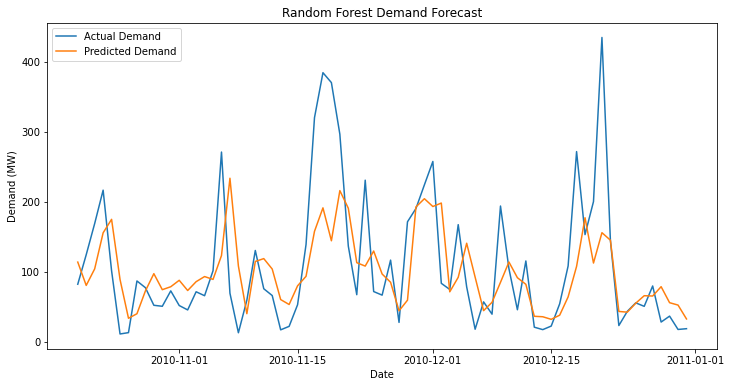

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Create a line plot of actual demand values vs predicted values
plt.plot(test.index, test_y, label='Actual Demand')
plt.plot(test.index, predictions, label='Predicted Demand')

plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.title('Random Forest Demand Forecast')
plt.legend()
plt.show()


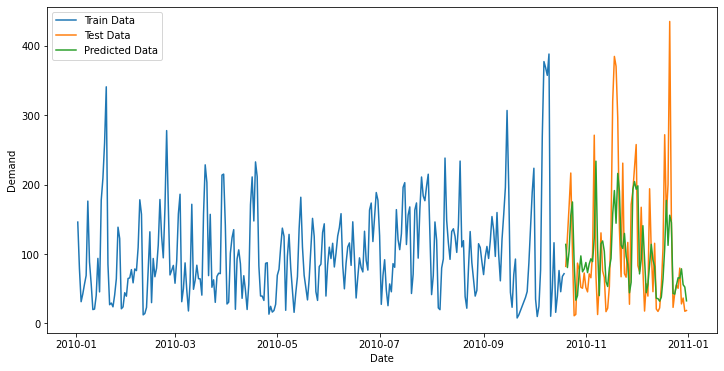

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot the actual values, training predictions, and testing predictions
plt.plot(train_y.index, train_y, label='Train Data')
plt.plot(test_y.index, test_y, label='Test Data')
plt.plot(test_y.index, predictions, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# CATBOOST Algorithm

In [13]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split



In [14]:
# Load the data
df = pd.read_csv('air_pollution.csv', index_col='date', parse_dates=True)
df = df[['pollution_today', 'temp','dew']]



In [15]:

# Create a lagged version of the demand variable to use as features
df['pollution_today_lagged'] = df['pollution_today'].shift()


In [16]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]



In [17]:
# Split the training and testing sets into features and target variables
train_X, train_y = train[['pollution_today_lagged', 'temp', 'dew']], train['pollution_today']
test_X, test_y = test[['pollution_today_lagged', 'temp', 'dew']], test['pollution_today']


In [18]:
# Fill missing values in the training and testing data
train_X = train_X.fillna(1)
test_X = test_X.fillna(1)



In [19]:
from catboost import CatBoostRegressor, Pool

# Convert the data into CatBoost's Pool format
train_pool = Pool(train_X, train_y)
test_pool = Pool(test_X, test_y)



In [20]:
# Define the CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=0)



In [21]:
# Fit the model to the training data
catboost_model.fit(train_pool)



0:	learn: 66.2729113	total: 136ms	remaining: 13.4s
1:	learn: 64.3905716	total: 140ms	remaining: 6.84s
2:	learn: 62.6829928	total: 143ms	remaining: 4.63s
3:	learn: 61.3077104	total: 147ms	remaining: 3.53s
4:	learn: 60.2142681	total: 151ms	remaining: 2.86s
5:	learn: 58.9484708	total: 154ms	remaining: 2.41s
6:	learn: 57.9045483	total: 158ms	remaining: 2.1s
7:	learn: 56.6488196	total: 161ms	remaining: 1.86s
8:	learn: 55.7991566	total: 163ms	remaining: 1.65s
9:	learn: 54.9971530	total: 165ms	remaining: 1.49s
10:	learn: 54.1778775	total: 167ms	remaining: 1.35s
11:	learn: 53.5095360	total: 169ms	remaining: 1.24s
12:	learn: 52.7116387	total: 170ms	remaining: 1.14s
13:	learn: 51.8437771	total: 172ms	remaining: 1.06s
14:	learn: 51.2790824	total: 174ms	remaining: 986ms
15:	learn: 50.6134091	total: 176ms	remaining: 922ms
16:	learn: 50.2321362	total: 177ms	remaining: 866ms
17:	learn: 49.5516034	total: 179ms	remaining: 816ms
18:	learn: 49.1788578	total: 181ms	remaining: 771ms
19:	learn: 48.6712810	t

In [22]:
# Make predictions on the test data
predictions = catboost_model.predict(test_pool)



**Model Evaluation**

In [23]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, predictions)
print('Mean Absolute Error:', mae)

# Calculate the R2 score
r2 = r2_score(test_y, predictions)
print('R2 Score:', r2)


Mean Squared Error: 5615.393566042217
Root Mean Squared Error: 74.93592974029359
Mean Absolute Error: 51.913497103489156
R2 Score: 0.38488523790881335


**Visualization(s)**

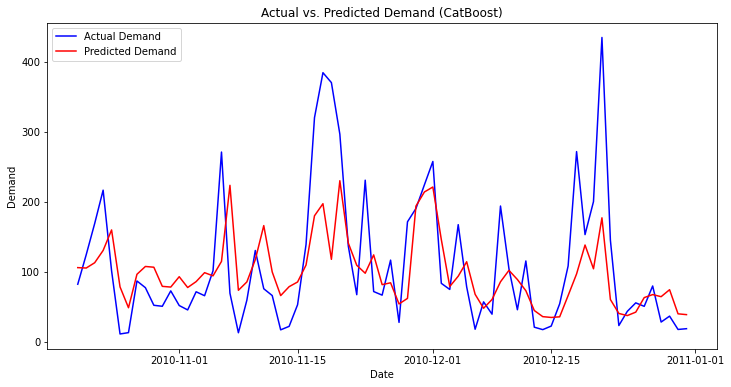

In [24]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted demand values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test_y, label='Actual Demand', color='blue')
plt.plot(test.index, predictions, label='Predicted Demand', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Predicted Demand (CatBoost)')
plt.legend()
plt.show()


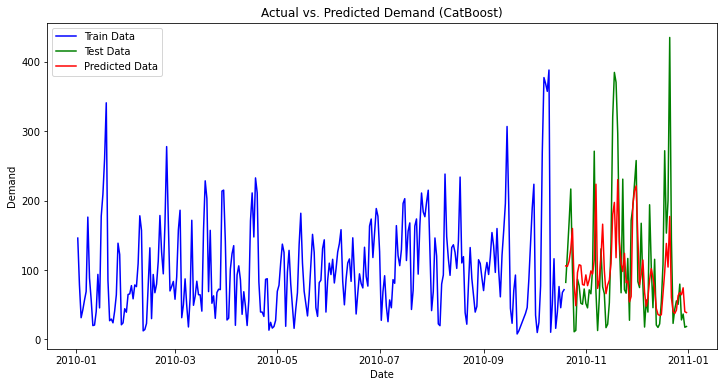

In [25]:
# Make predictions on the training and test sets
train_predictions = catboost_model.predict(train_pool)
test_predictions = catboost_model.predict(test_pool)

# Plot the actual values, training predictions, and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(train_y.index, train_y, label='Train Data', color='blue')
plt.plot(test_y.index, test_y, label='Test Data', color='green')
plt.plot(test_y.index, test_predictions, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('Actual vs. Predicted Demand (CatBoost)')
plt.show()

# 03- XGBoost

In [26]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




In [27]:
# Fill missing values with 1 (alternatively, you can use other methods to handle missing values)
train_X = train_X.fillna(1)
test_X = test_X.fillna(1)



In [28]:
# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb_model.fit(train_X, train_y)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [29]:
# Make predictions on the test data
predictions = xgb_model.predict(test_X)

# Calculate the evaluation metrics
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared (R2):', r2)

Mean Squared Error: 6827.753226668795
Mean Absolute Error: 56.780154004341085
Root Mean Squared Error: 82.63021981496112
R-squared (R2): 0.2520823781546975


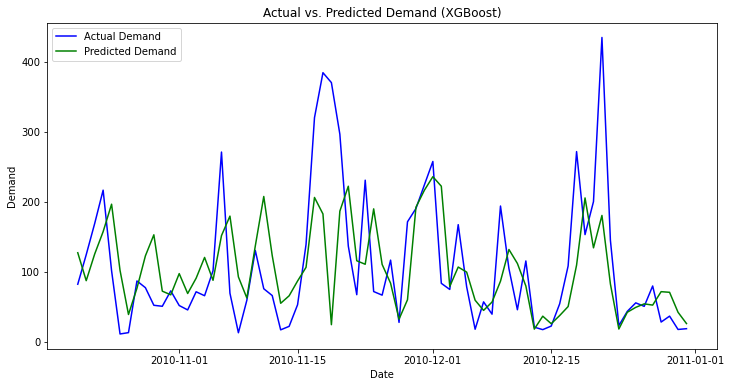

In [30]:
# Plot the actual values and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label='Actual Demand', color='blue')
plt.plot(test_y.index, predictions, label='Predicted Demand', color='green')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Predicted Demand (XGBoost)')
plt.legend()
plt.show()

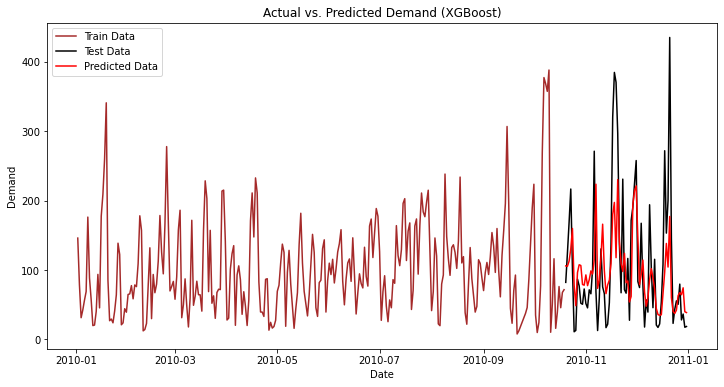

In [31]:
# Plot the actual values, training predictions, and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(train_y.index, train_y, label='Train Data', color='brown')
plt.plot(test_y.index, test_y, label='Test Data', color='black')
plt.plot(test_y.index, test_predictions, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('Actual vs. Predicted Demand (XGBoost)')
plt.show()

# 04- Prophet Algorithm

13:36:08 - cmdstanpy - INFO - Chain [1] start processing
13:36:08 - cmdstanpy - INFO - Chain [1] done processing


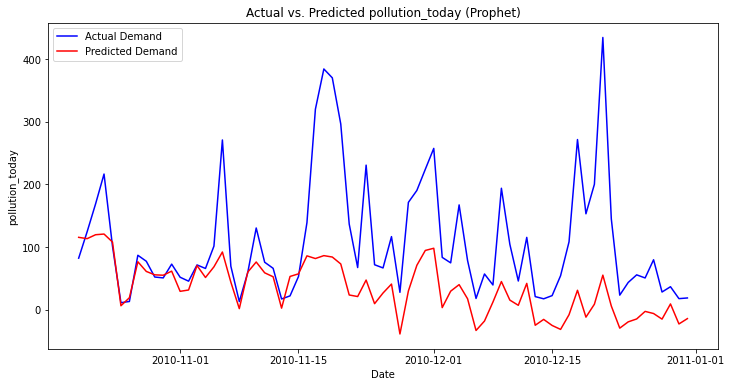

In [32]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('air_pollution.csv', index_col='date', parse_dates=True)
df = df[['pollution_today', 'temp','dew']]

# Create a lagged version of the demand variable to use as features
df['pollution_today_lagged'] = df['pollution_today'].shift()


# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fill missing values with 1 (alternatively, you can use other methods to handle missing values)
train = train.fillna(1)
test = test.fillna(1)

# Prepare the DataFrame for Prophet
train_prophet = train.reset_index()
train_prophet.rename(columns={'date': 'ds', 'pollution_today': 'y'}, inplace=True)

# Train the Prophet model
prophet_model = Prophet()
prophet_model.add_regressor('temp')
prophet_model.add_regressor('dew')
prophet_model.fit(train_prophet)

# Make future predictions for the test set
test_prophet = test.reset_index()
test_prophet.rename(columns={'date': 'ds', 'pollution_today': 'y'}, inplace=True)
test_prophet['temp'] = test['temp'].values
test_prophet['dewdewpnt'] = test['dew'].values

forecast = prophet_model.predict(test_prophet)

# Extracting the actual and predicted values
actual_values = test['pollution_today'].values
predicted_values = forecast['yhat'].values

# Plot the actual values and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, actual_values, label='Actual Demand', color='blue')
plt.plot(test.index, predicted_values, label='Predicted Demand', color='red')
plt.xlabel('Date')
plt.ylabel('pollution_today')
plt.title('Actual vs. Predicted pollution_today (Prophet)')
plt.legend()
plt.show()


In [34]:
# Calculate the evaluation metrics
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
rmse = np.sqrt(mse)


print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared (R2):', r2)
print('Root Mean Squared Error:', rmse)


Mean Squared Error: 6827.753226668795
Mean Absolute Error: 56.780154004341085
R-squared (R2): 0.2520823781546975
Root Mean Squared Error: 82.63021981496112


# Computational Complexity Analysis

13:36:09 - cmdstanpy - INFO - Chain [1] start processing
13:36:09 - cmdstanpy - INFO - Chain [1] done processing


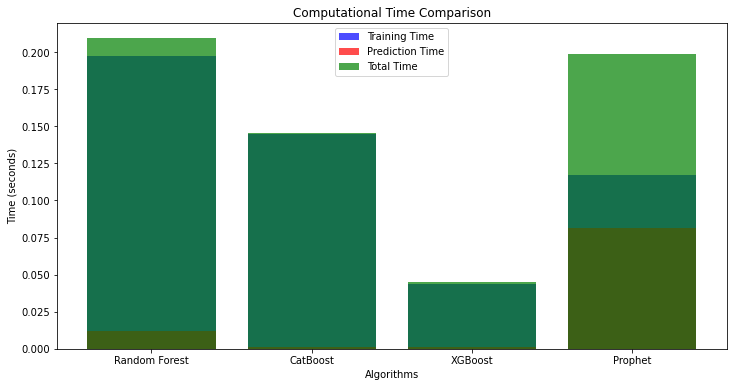

Random Forest - Training Time: 0.1975 seconds
Random Forest - Prediction Time: 0.0120 seconds
Random Forest - Total Time: 0.2094 seconds

CatBoost - Training Time: 0.1446 seconds
CatBoost - Prediction Time: 0.0010 seconds
CatBoost - Total Time: 0.1456 seconds

XGBoost - Training Time: 0.0439 seconds
XGBoost - Prediction Time: 0.0010 seconds
XGBoost - Total Time: 0.0449 seconds

Prophet - Training Time: 0.1171 seconds
Prophet - Prediction Time: 0.0818 seconds
Prophet - Total Time: 0.1989 seconds



In [35]:
# Store the algorithm names
import time
algorithm_names = ['Random Forest', 'CatBoost', 'XGBoost', 'Prophet']

# Initialize lists to store training, prediction, and total times
training_times = []
prediction_times = []
total_times = []

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
start_time = time.time()
rf_model.fit(train_X, train_y)
training_time_rf = time.time() - start_time

start_time = time.time()
rf_predictions = rf_model.predict(test_X)
prediction_time_rf = time.time() - start_time

# CatBoost
catboost_model = CatBoostRegressor(n_estimators=100, random_state=0, verbose=0)
start_time = time.time()
catboost_model.fit(train_X, train_y)
training_time_catboost = time.time() - start_time

start_time = time.time()
catboost_predictions = catboost_model.predict(test_X)
prediction_time_catboost = time.time() - start_time

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
start_time = time.time()
xgb_model.fit(train_X, train_y)
training_time_xgb = time.time() - start_time

start_time = time.time()
xgb_predictions = xgb_model.predict(test_X)
prediction_time_xgb = time.time() - start_time

# Prophet
train_prophet = train[['pollution_today']].reset_index()
train_prophet.rename(columns={'date': 'ds', 'pollution_today': 'y'}, inplace=True)

prophet_model = Prophet()
start_time = time.time()
prophet_model.fit(train_prophet)
training_time_prophet = time.time() - start_time

test_prophet = test[['pollution_today']].reset_index()
test_prophet.rename(columns={'date': 'ds', 'pollution_today': 'y'}, inplace=True)
test_prophet['temp'] = test['temp'].values
test_prophet['dew'] = test['dew'].values

start_time = time.time()
forecast = prophet_model.predict(test_prophet)
prophet_predictions = forecast['yhat'].values
prediction_time_prophet = time.time() - start_time

# Calculate total times
total_time_rf = training_time_rf + prediction_time_rf
total_time_catboost = training_time_catboost + prediction_time_catboost
total_time_xgb = training_time_xgb + prediction_time_xgb
total_time_prophet = training_time_prophet + prediction_time_prophet

# Store times in lists
training_times = [training_time_rf, training_time_catboost, training_time_xgb, training_time_prophet]
prediction_times = [prediction_time_rf, prediction_time_catboost, prediction_time_xgb, prediction_time_prophet]
total_times = [total_time_rf, total_time_catboost, total_time_xgb, total_time_prophet]

# Create a bar plot to visualize the training, prediction, and total times
plt.figure(figsize=(12, 6))
plt.bar(algorithm_names, training_times, label='Training Time', color='blue', alpha=0.7)
plt.bar(algorithm_names, prediction_times, label='Prediction Time', color='red', alpha=0.7)
plt.bar(algorithm_names, total_times, label='Total Time', color='green', alpha=0.7)
plt.xlabel('Algorithms')
plt.ylabel('Time (seconds)')
plt.title('Computational Time Comparison')
plt.legend()
plt.show()

# Print the values
for i, algorithm in enumerate(algorithm_names):
    print(f'{algorithm} - Training Time: {training_times[i]:.4f} seconds')
    print(f'{algorithm} - Prediction Time: {prediction_times[i]:.4f} seconds')
    print(f'{algorithm} - Total Time: {total_times[i]:.4f} seconds')
    print()
